In [1]:
import pandas as pd
import matplotlib.pyplot as plt


import sys
sys.path += ['Package/']  

from eder import *

import warnings
warnings.filterwarnings("ignore")

directory_root = '/home/lorenzo/Scrivania/My_projects/DeepWalk/Codes/'

In [2]:
def Normal(μ, σ2, t):
    
    return 1/np.sqrt(2*np.pi*σ2)*np.exp(-(t - μ)**2/(2*σ2))

In [3]:
all_f = [0, 7, 9, 224]
kv = [1, 2, 3, 4, 5, 6, 7, 8]

Xv, Zv, Zest, μv, σ2v, πv = [], [], [], [], [], []
cov_type = 'full'

for f in all_f:

    print('I am reading f: ' + str(f))
    X = pd.read_csv(directory_root + 'embeddings/' + str(f) + '.txt', skiprows = 1, on_bad_lines='skip', 
                    sep = ' ', header = None, encoding='latin-1')
    X.set_index(0, inplace = True)
    X = X.dropna(axis = 1)
    X = X.values

    n, dim = np.shape(X)
    print(n, dim)

    norms = np.sqrt(X**2@np.ones(dim))
    X = X/np.mean(norms)
    
    Xv.append(X)

    indeces = np.random.choice(np.arange(n), 1000, replace = False)
    
    print('I am computing the Z values')
    
    Zv.append(computeZ(X, indeces))
    Zest.append([computeZest(X, indeces, k = k, cov_type = cov_type) for k in kv])
    _, μ, σ2, π = computeZest(X, [0], k = 5, return_params = True, cov_type = cov_type)
    μv.append(μ)
    σ2v.append(σ2)
    πv.append(π)
    
    print('-------------------------\n')

I am reading f: 0
163473 300
I am computing the Z values
-------------------------

I am reading f: 7
273930 300
I am computing the Z values
-------------------------

I am reading f: 9
273930 300
I am computing the Z values
-------------------------

I am reading f: 224
99884 200
I am computing the Z values
-------------------------



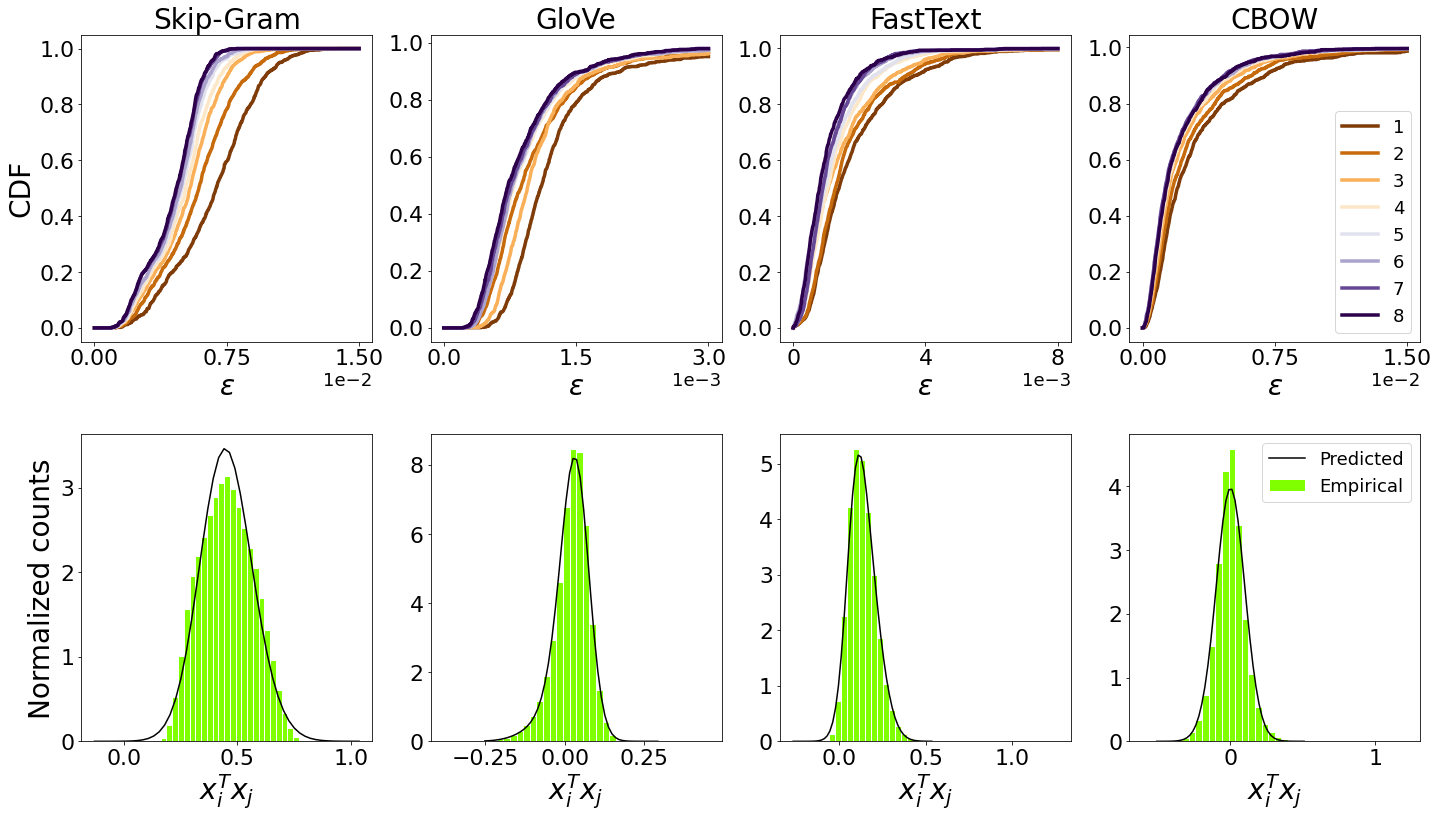

In [5]:
fig, ax = plt.subplots(2,4, figsize = (4*6, 2*5 + 3))
fig.subplots_adjust(hspace = .3)
fs = 22
ffs = 18
Fs = 28
max_val = [0.015, 0.003, 0.008, 0.015]

# rc('font', size = 25)

titles = ['Skip-Gram', 'GloVe', 'FastText', 'CBOW']
linestyle = ['-', '--', '-.']

cmap = plt.cm.get_cmap('PuOr', len(Zest[0]))

for i, (Z, Ze, X, μ, σ2, π) in enumerate(zip(Zv, Zest, Xv, μv, σ2v, πv)):
    for j in range(len(Zest[0])):
        
        tv = np.linspace(0, max_val[i], 1000)
        eps = np.abs(Z - Ze[j])/Z
        ax[0,i].plot(tv, np.array([np.sum(eps < t)/len(eps) for t in tv]), color = cmap(j), 
                   label = kv[j], linewidth = 3.5, linestyle = linestyle[0])
        
        if i == 3:
            ax[0,i].legend(fontsize = ffs)
        
        ax[0,i].set_xticks(np.linspace(0, max(tv), 3))
        ax[0,i].tick_params(axis = 'both', labelsize = fs)
        ax[0,i].set_xlabel(r'$\epsilon$', fontsize = Fs)
        
    n, dim = np.shape(X)   
    a = np.random.randint(n)
    
    ax[1, i].hist(X[a]@X.T, bins = 40, edgecolor = 'white', color = 'chartreuse', 
                  density = True, label = 'Empirical')

    m = np.mean(X[a]@X.T) 
    s = np.sqrt(np.var(X[a]@X.T))
    t = np.linspace(m - 5*s, m + 5*s)
    
    y = np.sum(np.diag(π/n)@np.array([Normal(X[a]@μ[b], X[a]@σ2[b]@X[a], t) for b in range(len(μ))]), axis = 0)
    ax[1, i].plot(t, y, color = 'k', label = 'Predicted')

    if i == 3:
        ax[1,i].legend(fontsize = ffs)

    ax[1,i].tick_params(axis = 'both', labelsize = fs)
    ax[1,i].set_xlabel(r'$x_i^Tx_j$', fontsize = Fs)
    
    ax[0,i].set_title(titles[i], fontsize = Fs)
    ax[0,i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[0,i].xaxis.get_offset_text().set_fontsize(18)
        

ax[0,0].set_ylabel('CDF', fontsize = Fs)
ax[1,0].set_ylabel('Normalized counts', fontsize = Fs)

directory_figures = '/home/lorenzo/Scrivania/My_projects/DeepWalk/paper/Figures/'

plt.savefig(directory_figures + 'test_' + cov_type + '.pdf', bbox_inches='tight', dpi = 400)

plt.show();